# DAE 1 Variables and Measurement

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning Goals
After working your way through this notebook you should be able to..

- Explain what is meant by 
  + Independent variable
  + Dependent variable
- Give examples of different measurement scales
- Discuss sensitivity of measurement 

  

## Table of Contents

- [1. Variables](#Variables)
    - [1.1 Manipulating Variables](#Manipulating)
- [2. Measurement Scales](#Scales)
- [3. Sensitivity](#Sensitivity)


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id= 'Variables'> </a>


## 1 Variables 

A variable is something that can take at lease two values. It can be pretty much anything: the number of times one goes out the door during a day; how fast a player can go through a puzzle game; or what users rate a product that is tested. 

We tend to be interested in such things because they can help us to answer our research questions. Which, in turn, could be: "Does it have an effect if the queen is telling us to stay in or not?"; " Can sound effects help players solve a puzzle game more efficiently?"; " Do users prefer our product to another?"



<a id= 'Manipulating'> </a>


### 1.1 Manipulating Variables

The previous examples of research questions all concern whether two variables are *related* in some way. That is, does A have an effect on B? 
To answer our question we collect data on variables A and B and see if there is a relationship between them. We can for example do this by observations, or correlating the variables. But to be completely sure that indeed A has an effect on B we need to set up experiments where we *manipulate* A and measure B. If B changes when nothing but A is altered, we can (with some confidence) say that A has an effect on B. This is the essence of an experiment: manipulating only one variable, keeping everything else constant, and then measuring the effect. 

The *INDEPENDENT* variable is something that is controlled and manipulated
by the experimenter in order to create different conditions for the
experiment. The aim is to see if there if these manipulations have an
effect on the *DEPENDENT* variable (which is the one to be measured).


Text(0, 0.5, 'B (Dependent variable)')

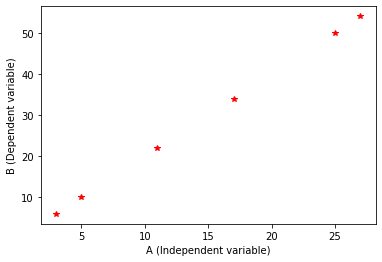

In [2]:
#Let's assume we have a variable A
# we can generate an array 
A=np.array([3,5,11,17,25,27])

#And if B is a dependent variable there may be a relationship between the two
B=2*A


plt.plot(A,B, 'r*')

plt.xlabel('A (Independent variable)')
plt.ylabel('B (Dependent variable)')

### Try out 1: 
Now specify another variable

In [5]:
#TRY OUT: 
#specify a variable C= A+ 20 and plot this vs. A

C=
plt.plot(A,C, 'b+')

In [39]:
# We can combine our variables into a 2D array
array=np.array([A,B,C])
array

array([[ 3,  5, 11, 17, 25, 27],
       [ 6, 10, 22, 34, 50, 54],
       [23, 25, 31, 37, 45, 47]])

In [51]:
#But more convenient for statistical analysis is to have the variables in a DATA FRAME
df = pd.DataFrame(array.T, columns=(["A","B","C"]), index=[1,2,3,4,5,6])
df

,A,B,C
1,3,6,23
2,5,10,25
3,11,22,31
4,17,34,37
5,25,50,45
6,27,54,47


In [53]:
#and this also allow some quick diagnostics
df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,14.666667,29.333333,34.666667
std,10.073066,20.146133,10.073066
min,3.000000,6.000000,23.000000
25%,6.500000,13.000000,26.500000
50%,14.000000,28.000000,34.000000
75%,23.000000,46.000000,43.000000
max,27.000000,54.000000,47.000000


<a id= 'Scales'> </a>

## 2. Measurement Scales

The dependent variable can be measured using different scales. The data
collected can be numerical or categorical, and different kinds of
measurement scales calls for different kinds of analysis methods. That
is, depending on the question one might be more suitable to use than the
other.

*Nominal:*   When there is not a natural ordering of the categories. Examples
    might be categorization of gender, race, religion, or type of sport.

*Ordinal:*   When the categories can be ordered. Categorical variables that judge
    size (small, medium, large, etc.) are ordinal variables. However,
    the difference between small and medium is not necessarily the same
    as the difference between medium and large.

*Interval:*   In an interval scale, the numbers are meaningful. That is, the
    difference between scale values are equidistant. However, zero is by
    convention and *doubling* is not really meaningful (50 degrees Celcius
    is not half as hot as 100 degrees Celsius and 0 degrees).

*Ratio:*   A scale that has a meaningful zero value (e.g. 0 kg as in no mass) and equidistant measure:
    doubling principle (10 yrs is twice as old than 5 yr). 

(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

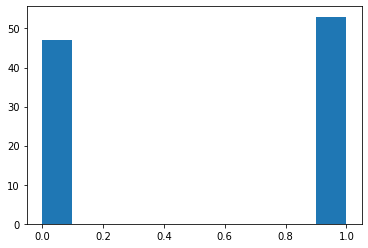

In [81]:
# For instance, selecting between one or another version, registering gender (male/female) and
# flipping a coin are all examples nominal measurement scales. There is no natural ordering and no in-between the categories. 

# We can see this by simulating N=100 coin flips 
score=np.random.randint(2, size=100) #generate vector with scores

#and plot the histogram
plt.hist(score)


In [82]:
#BUT, if we count the number of heads in each 100 tosses and obtain the total number of heads, we use another measurement scale

sum(score) #this is ratio scale


53

Text(0.5, 0, 'number of heads')

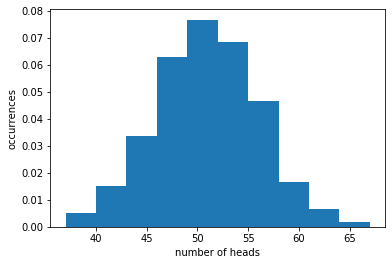

In [86]:
#Note that even if we expect that both categories are approximately equal, the sum of heads vary slightly.
#If we draw a lot of samples, however, we should see them centered around the expected 50-50

#We can repeat this a number of times with different number of throws (N)
K=1000 #how many samples we collect
N=[100] #sample size

meanarr=np.zeros(K, float)

for i in range(0,len(N)):
    for j in range(0,K):
       score=np.random.randint(2, size=N) #generate vector with scores
       meanarr[j]=sum(score)# calculate the frequency of heads for K=j  
    count, bins, ignored =plt.hist(meanarr, density=True) #plot histogram with K means

plt.ylabel('occurrences')
plt.xlabel('number of heads')


### Try out 2: 
What measurement scale is used here?

![](Generalstab-der-US-Army.jpg "Title")

In order to answer this, you need to consider the following:
- Does the total number of stars mean an ordering high - low?
- If yes, can you be sure that the difference between one and two stars is the same as between four and five stars?


<a id= 'Sensitivity'> </a>

## 3 Sensitivity

There a difference of asking

*Did you like this product? (Select one)*

<YES / NO >

or 

*To what degree did you like this product? (put a cross on the scale)*

Not at all<------------------------------> Very much


While the first option is categorical, the second (if done on paper or with an online slider) is continuous. 
Thus, the different measures apply different measurement scales, and they also have different *sensitivity*.
The second way of asking, will give you more detailed information on the degree the product is successful.




### Try out 3: 
Compare the above examples to the commonly used way to rate experience that is used in here (in Microsoft Teams). What measurement scale is used? How is the sensitivity compared to other scales that could be used?


![](CallQuality.png "Title")